In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_df = pd.read_csv("./static/data/clean_redwineq.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality,quality_label
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8,excellent
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8,excellent
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,excellent
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8,excellent
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,excellent


In [3]:
corr = wine_df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
fixed acidity,1.000000,-0.255221,0.671140,0.114862,0.093588,-0.154137,-0.113663,0.668060,-0.681656,0.184852,-0.061605,0.123905
volatile acidity,-0.255221,1.000000,-0.552993,0.001948,0.061750,-0.012441,0.074567,0.023568,0.234303,-0.261796,-0.204749,-0.390994
citric acid,0.671140,-0.552993,1.000000,0.143343,0.203758,-0.058749,0.035820,0.364539,-0.540134,0.315198,0.110907,0.226967
residual sugar,0.114862,0.001948,0.143343,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085831,0.005234,0.042075,0.013732
chlorides,0.093588,0.061750,0.203758,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264661,0.371243,-0.221141,-0.128907
free sulfur dioxide,-0.154137,-0.012441,-0.058749,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071413,0.049870,-0.069408,-0.050656
total sulfur dioxide,-0.113663,0.074567,0.035820,0.203028,0.047400,0.667666,1.000000,0.071269,-0.064986,0.043061,-0.205654,-0.185100
density,0.668060,0.023568,0.364539,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.340693,0.149185,-0.496180,-0.174919
pH,-0.681656,0.234303,-0.540134,-0.085831,-0.264661,0.071413,-0.064986,-0.340693,1.000000,-0.198749,0.205495,-0.056940
sulfates,0.184852,-0.261796,0.315198,0.005234,0.371243,0.049870,0.043061,0.149185,-0.198749,1.000000,0.092680,0.251995


In [4]:
corr['count'] = corr['quality'].abs()*100
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality,count
fixed acidity,1.000000,-0.255221,0.671140,0.114862,0.093588,-0.154137,-0.113663,0.668060,-0.681656,0.184852,-0.061605,0.123905,12.390521
volatile acidity,-0.255221,1.000000,-0.552993,0.001948,0.061750,-0.012441,0.074567,0.023568,0.234303,-0.261796,-0.204749,-0.390994,39.099418
citric acid,0.671140,-0.552993,1.000000,0.143343,0.203758,-0.058749,0.035820,0.364539,-0.540134,0.315198,0.110907,0.226967,22.696729
residual sugar,0.114862,0.001948,0.143343,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085831,0.005234,0.042075,0.013732,1.373164
chlorides,0.093588,0.061750,0.203758,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264661,0.371243,-0.221141,-0.128907,12.890656
free sulfur dioxide,-0.154137,-0.012441,-0.058749,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071413,0.049870,-0.069408,-0.050656,5.065606
total sulfur dioxide,-0.113663,0.074567,0.035820,0.203028,0.047400,0.667666,1.000000,0.071269,-0.064986,0.043061,-0.205654,-0.185100,18.510029
density,0.668060,0.023568,0.364539,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.340693,0.149185,-0.496180,-0.174919,17.491923
pH,-0.681656,0.234303,-0.540134,-0.085831,-0.264661,0.071413,-0.064986,-0.340693,1.000000,-0.198749,0.205495,-0.056940,5.694007
sulfates,0.184852,-0.261796,0.315198,0.005234,0.371243,0.049870,0.043061,0.149185,-0.198749,1.000000,0.092680,0.251995,25.199504


In [5]:
corr = corr.drop("quality", axis=0)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality,count
fixed acidity,1.000000,-0.255221,0.671140,0.114862,0.093588,-0.154137,-0.113663,0.668060,-0.681656,0.184852,-0.061605,0.123905,12.390521
volatile acidity,-0.255221,1.000000,-0.552993,0.001948,0.061750,-0.012441,0.074567,0.023568,0.234303,-0.261796,-0.204749,-0.390994,39.099418
citric acid,0.671140,-0.552993,1.000000,0.143343,0.203758,-0.058749,0.035820,0.364539,-0.540134,0.315198,0.110907,0.226967,22.696729
residual sugar,0.114862,0.001948,0.143343,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085831,0.005234,0.042075,0.013732,1.373164
chlorides,0.093588,0.061750,0.203758,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264661,0.371243,-0.221141,-0.128907,12.890656
free sulfur dioxide,-0.154137,-0.012441,-0.058749,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071413,0.049870,-0.069408,-0.050656,5.065606
total sulfur dioxide,-0.113663,0.074567,0.035820,0.203028,0.047400,0.667666,1.000000,0.071269,-0.064986,0.043061,-0.205654,-0.185100,18.510029
density,0.668060,0.023568,0.364539,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.340693,0.149185,-0.496180,-0.174919,17.491923
pH,-0.681656,0.234303,-0.540134,-0.085831,-0.264661,0.071413,-0.064986,-0.340693,1.000000,-0.198749,0.205495,-0.056940,5.694007
sulfates,0.184852,-0.261796,0.315198,0.005234,0.371243,0.049870,0.043061,0.149185,-0.198749,1.000000,0.092680,0.251995,25.199504


In [6]:
corr = corr.round({"count": 0})
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality,count
fixed acidity,1.000000,-0.255221,0.671140,0.114862,0.093588,-0.154137,-0.113663,0.668060,-0.681656,0.184852,-0.061605,0.123905,12.0
volatile acidity,-0.255221,1.000000,-0.552993,0.001948,0.061750,-0.012441,0.074567,0.023568,0.234303,-0.261796,-0.204749,-0.390994,39.0
citric acid,0.671140,-0.552993,1.000000,0.143343,0.203758,-0.058749,0.035820,0.364539,-0.540134,0.315198,0.110907,0.226967,23.0
residual sugar,0.114862,0.001948,0.143343,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085831,0.005234,0.042075,0.013732,1.0
chlorides,0.093588,0.061750,0.203758,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264661,0.371243,-0.221141,-0.128907,13.0
free sulfur dioxide,-0.154137,-0.012441,-0.058749,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071413,0.049870,-0.069408,-0.050656,5.0
total sulfur dioxide,-0.113663,0.074567,0.035820,0.203028,0.047400,0.667666,1.000000,0.071269,-0.064986,0.043061,-0.205654,-0.185100,19.0
density,0.668060,0.023568,0.364539,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.340693,0.149185,-0.496180,-0.174919,17.0
pH,-0.681656,0.234303,-0.540134,-0.085831,-0.264661,0.071413,-0.064986,-0.340693,1.000000,-0.198749,0.205495,-0.056940,6.0
sulfates,0.184852,-0.261796,0.315198,0.005234,0.371243,0.049870,0.043061,0.149185,-0.198749,1.000000,0.092680,0.251995,25.0


In [7]:
counts = corr["count"].to_list()
print(counts)
columns = corr.index.to_list()
print(columns)

[12.0, 39.0, 23.0, 1.0, 13.0, 5.0, 19.0, 17.0, 6.0, 25.0, 48.0]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulfates', 'alcohol']


In [8]:
word_col = []
y = 0
for count in counts:
    words = ""
    for x in range(0, int(count)*1000):
        words = words + columns[y] + " "
    word_col.append(words)
    y += 1
    
corr["words"] = word_col
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality,count,words
fixed acidity,1.000000,-0.255221,0.671140,0.114862,0.093588,-0.154137,-0.113663,0.668060,-0.681656,0.184852,-0.061605,0.123905,12.0,fixed acidity fixed acidity fixed acidity fixe...
volatile acidity,-0.255221,1.000000,-0.552993,0.001948,0.061750,-0.012441,0.074567,0.023568,0.234303,-0.261796,-0.204749,-0.390994,39.0,volatile acidity volatile acidity volatile aci...
citric acid,0.671140,-0.552993,1.000000,0.143343,0.203758,-0.058749,0.035820,0.364539,-0.540134,0.315198,0.110907,0.226967,23.0,citric acid citric acid citric acid citric aci...
residual sugar,0.114862,0.001948,0.143343,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085831,0.005234,0.042075,0.013732,1.0,residual sugar residual sugar residual sugar r...
chlorides,0.093588,0.061750,0.203758,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264661,0.371243,-0.221141,-0.128907,13.0,chlorides chlorides chlorides chlorides chlori...
free sulfur dioxide,-0.154137,-0.012441,-0.058749,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071413,0.049870,-0.069408,-0.050656,5.0,free sulfur dioxide free sulfur dioxide free s...
total sulfur dioxide,-0.113663,0.074567,0.035820,0.203028,0.047400,0.667666,1.000000,0.071269,-0.064986,0.043061,-0.205654,-0.185100,19.0,total sulfur dioxide total sulfur dioxide tota...
density,0.668060,0.023568,0.364539,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.340693,0.149185,-0.496180,-0.174919,17.0,density density density density density densit...
pH,-0.681656,0.234303,-0.540134,-0.085831,-0.264661,0.071413,-0.064986,-0.340693,1.000000,-0.198749,0.205495,-0.056940,6.0,pH pH pH pH pH pH pH pH pH pH pH pH pH pH pH p...
sulfates,0.184852,-0.261796,0.315198,0.005234,0.371243,0.049870,0.043061,0.149185,-0.198749,1.000000,0.092680,0.251995,25.0,sulfates sulfates sulfates sulfates sulfates s...


In [9]:
words = corr.words[0]
words

'fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed

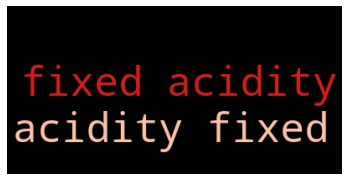

In [10]:
wordcloud = WordCloud(colormap="Reds").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
words = " ".join(list for list in corr.words)
words

'fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed acidity fixed

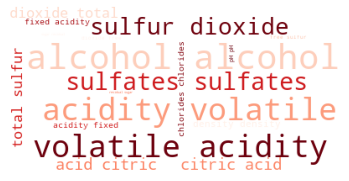

In [14]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, colormap="Reds", background_color="white").generate(words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

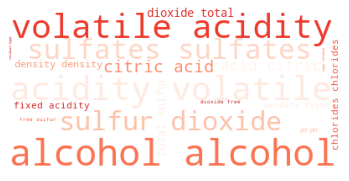

In [15]:
wordcloud = WordCloud(max_font_size= 100, colormap="Reds", max_words=30, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
wordcloud.to_file("static/img/first_review.png")

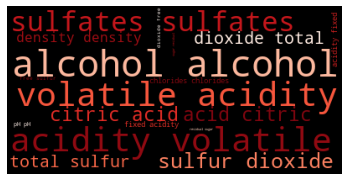

In [17]:
wordcloud = WordCloud(max_font_size= 100, colormap="Reds", max_words=30, background_color="black").generate(words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
wordcloud.to_file("static/img/second_review.png")

In [19]:
wine_mask = np.array(Image.open("static/img/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [21]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int64)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [22]:
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int64)

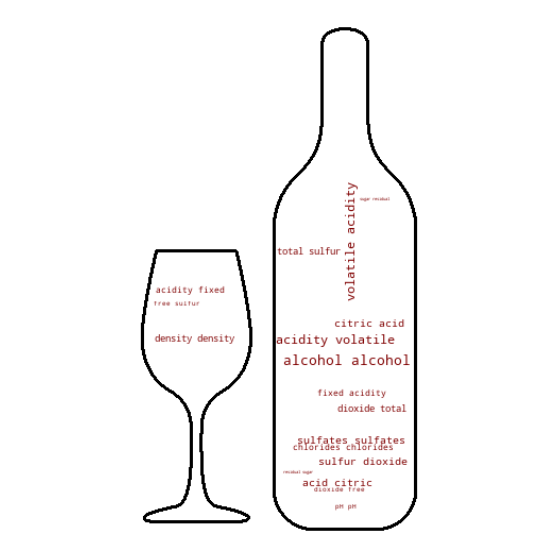

In [24]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, color_func=lambda *args, **kwargs: "maroon", mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=2, contour_color='black')

# Generate a wordcloud
wc.generate(words)

# store to file
wc.to_file("static/img/wine3.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()